# Lesson: working with netCDF data

In the [primer](01-primer.ipynb), you learned how to use the basic features of the python language with the numpy and matplotlib libraries. The purpose of today's lesson is to introduce you to the main tool that you will use in analysing climate data: [xarray](https://docs.xarray.dev).

This is a dense lesson. Please do it entirely and try to remember its structure and content. This code will provide a template for your own code, and you can always come back to these examples when you'll need them. I don't expect you to understand all details, but I hope that you are going to get acquainted with the "xarray way" of manipulating multi-dimensional data. You will have to copy and adapt parts of the code below to complete the assignments.

## NetCDF Files

In order to open and plot NetCDF files, you'll need to install the `xarray` and `netcdf4` packages: if you haven't done so already, follow the installation instructions!

### Imports and options

First, let's import the tools we need. Remember why we need to import our tools? If not, ask Fabien! 

In [1]:
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

### Get the data 

Let's open the ERA5 2m air temperature file (``ERA5_LowRes_Monthly_t2m.nc``). The files are available from the [download instructions](https://fabienmaussion.info/climate_risks/ready/03-download.html) page.

### Read the data

Most of today's meteorological data is stored in the NetCDF format (``*.nc``). NetCDF files are binary files, which means that you can't just open them in a text editor. You need a special reader for it. Nearly all the programming languages offer an interface to NetCDF. For this course we are going to use the [xarray](http://xarray.pydata.org/en/stable/) library to read the data:

In [2]:
# Here I downloaded the file in the "data" folder which I placed in a folder close to this notebook
# The variable name "ds" stands for "dataset"
ds = xr.open_dataset(r'../data/ERA5_LowRes_Monthly_t2m.nc')

You'll have to give an absolute or relative path to the file for this to work. For example ``r'C:\PATH\TO\FILE\ERA5_LowRes_Monthly_t2m'`` on windows.

**Windows users: don't forget to add the `r` before the path, which allows to use backlashes in the string.**

**If you are getting an “HDF Error” related to NetCDF4 when reading the file**, install the h5netcdf library (`mamba install h5netcdf`), restart your kernel, and open the file with:

    ds = xr.open_dataset(fpath, engine='h5netcdf')

In [3]:
# See what we have
ds

<xarray.Dataset> Size: 255MB
Dimensions:    (time: 552, latitude: 241, longitude: 480)
Coordinates:
  * time       (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2024-12-01
  * latitude   (latitude) float64 2kB 90.0 89.25 88.5 ... -88.5 -89.25 -90.0
  * longitude  (longitude) float64 4kB -179.6 -178.9 -178.1 ... 178.9 179.6
Data variables:
    t2m        (time, latitude, longitude) float32 255MB ...
Attributes:
    Conventions:  CF-1.7
    institution:  European Centre for Medium-Range Weather Forecasts

The NetCDF dataset is constituted of various elements: Dimensions, Coordinates, Variables, Attributes:
- the dimensions specify the number of elements of each data coordinate, their names should be understandable and specific
- the coordinates locate the data in space and time
- the attributes provide some information about the file (metadata)
- the variables contain the actual data. In our file there is only one variable. It has the dimensions [time, latitude, longitude], so we can expect an array of size [552, 241, 480]

### Coordinates 

Let's have a look at the **time** coordinate first:

In [4]:
ds.time

<xarray.DataArray 'time' (time: 552)> Size: 4kB
array(['1979-01-01T00:00:00.000000000', '1979-02-01T00:00:00.000000000',
       '1979-03-01T00:00:00.000000000', ..., '2024-10-01T00:00:00.000000000',
       '2024-11-01T00:00:00.000000000', '2024-12-01T00:00:00.000000000'],
      shape=(552,), dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2024-12-01
Attributes:
    long_name:      time
    standard_name:  time

The array contains dates (`datetime64` to be precise). From the output we can infer that they represent the first day for each month from 1979 to 2024.

The **location coordinates** are also self-explaining:

In [5]:
ds.longitude

<xarray.DataArray 'longitude' (longitude: 480)> Size: 4kB
array([-179.625, -178.875, -178.125, ...,  178.125,  178.875,  179.625],
      shape=(480,))
Coordinates:
  * longitude  (longitude) float64 4kB -179.6 -178.9 -178.1 ... 178.9 179.6
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      longitude

In [6]:
ds.latitude

<xarray.DataArray 'latitude' (latitude: 241)> Size: 2kB
array([ 90.  ,  89.25,  88.5 , ..., -88.5 , -89.25, -90.  ], shape=(241,))
Coordinates:
  * latitude  (latitude) float64 2kB 90.0 89.25 88.5 ... -88.5 -89.25 -90.0
Attributes:
    units:             degrees_north
    standard_name:     latitude
    long_name:         latitude
    stored_direction:  decreasing

**Q: what is the spatial resolution of ERA5 data you downloaded?**

In [7]:
# your answer here

**Q: do you know what ERA5 data is? Use your favorite search engine to get some basic information about it. What institution provides the data? Which time period is it available for? Where could you get the data if you need it for your upcoming dissertation? What is the spatial resolution of ERA5 according to the data provider?**

In [8]:
# your answer here

### Variables 

Variables can also be accessed directly from the dataset:

In [9]:
ds.t2m  # alternatively: ds['t2m']

<xarray.DataArray 't2m' (time: 552, latitude: 241, longitude: 480)> Size: 255MB
[63855360 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2024-12-01
  * latitude   (latitude) float64 2kB 90.0 89.25 88.5 ... -88.5 -89.25 -90.0
  * longitude  (longitude) float64 4kB -179.6 -178.9 -178.1 ... 178.9 179.6
Attributes:
    long_name:      2 metre temperature
    units:          K
    standard_name:  unknown

The **attributes** of a variable are extremely important, they carry the *metadata* and must be specified by the data provider. Here we can read in which units the variable is defined, as well as a description of the variable (the "long_name" attribute).

**Q: what information can we read from this printout?**

In [10]:
# your answer here

### Multidimensional data

I find it very useful to always think about NetCDF data as a cube. Much like the image below:

![](https://docs.xarray.dev/en/stable/_images/dataset-diagram.png)

A lot of the things we will do in this unit has to do with selecting data along a dimension, or "reducing" data along a dimension, for example for a time or longitudinal average. The more and more you'll train those skills, the easier it will get - I promise!

## Simple analyses 

Analysing climate data is made (relatively!) easy in Python thanks to the [xarray](https://docs.xarray.dev) and [cartopy](https://scitools.org.uk/cartopy/docs/latest/) libraries. First we are going to compute the time average of the 2 metre temperature over the entire period:

In [11]:
t2m_avg = ds.t2m.mean(dim='time')

What did we just do? From the netcdf dataset, we exctracted the t2m variable (``ds.t2m``) and we applied the function `.mean()` to it. So an equivalent formulation could be:

In [12]:
# Equivalent code:
t2m = ds.t2m
t2m_avg = t2m.mean(dim='time')

What is ``t2m_avg`` by the way?

In [13]:
t2m_avg

<xarray.DataArray 't2m' (latitude: 241, longitude: 480)> Size: 463kB
array([[259.32947, 259.32947, 259.32947, ..., 259.32947, 259.32947,
        259.32947],
       [259.26822, 259.26462, 259.261  , ..., 259.27454, 259.27286,
        259.271  ],
       [259.2535 , 259.25037, 259.24548, ..., 259.2627 , 259.25958,
        259.25656],
       ...,
       [227.8475 , 227.85873, 227.87387, ..., 227.81087, 227.82344,
        227.83572],
       [227.18623, 227.20026, 227.21439, ..., 227.11926, 227.14503,
        227.16989],
       [227.7431 , 227.7431 , 227.7431 , ..., 227.7431 , 227.7431 ,
        227.7431 ]], shape=(241, 480), dtype=float32)
Coordinates:
  * latitude   (latitude) float64 2kB 90.0 89.25 88.5 ... -88.5 -89.25 -90.0
  * longitude  (longitude) float64 4kB -179.6 -178.9 -178.1 ... 178.9 179.6

So `t2m_avg` is a 2-dimensional array of dimensions [latitude, longitude]. Note that the time dimension has disappeared during the averaging, which is why this operation is sometimes described as "data reduction": we lost the time information by reducing it to a "simple" time average.

When we applied the `mean()` function, we added an argument (called a **keyword argument**): ``dim='time'``. With this argument, we told the function to compute the average *over the time dimension*.

Let's remove this keyword and compute the mean again:

In [14]:
t2m.mean()

<xarray.DataArray 't2m' ()> Size: 4B
array(278.4355, dtype=float32)

Ha! We now have an array without dimensions: a single element array, also called a **scalar**. This is the total average over all the dimensions. We'll come back to this later...

*Note: scalar output is quite verbose in xarray... Your can print simpler scalars on screen with the .item() method:*

In [15]:
t2m.mean().item()

278.43548583984375

**Q: what should we expect from the folowing commands:**

    t2m.mean(dim='longitude')
    t2m.mean(dim='time').mean(dim='longitude')
    t2m.mean(dim=['time', 'longitude'])
    
**Try them out!**

In [16]:
# Try the commands above. Do they work as expected? 

**E: what is the maximum 2m temperature value? And the minimum?** ([hint](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.min.html))

In [17]:
# your answer here

## A first plot 

### 2d data

We are now going to plot the average 2m temperature on a map:

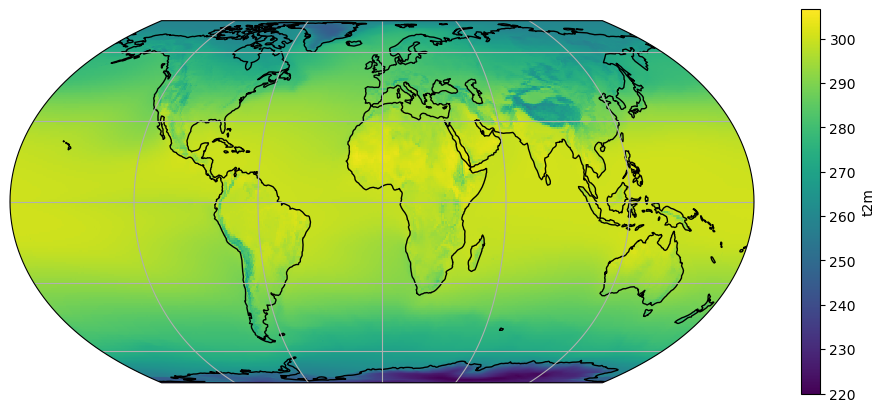

In [18]:
# Define the map projection (how does the map look like)
ax = plt.axes(projection=ccrs.EqualEarth())
# ax is an empty plot. We now plot the variable sw_avg onto ax
t2m_avg.plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
ax.coastlines(); ax.gridlines(); # Add gridlines and coastlines to the plot

We are looking at the average temperature, expressed in K. Such time averages are sometimes writen with a bar on top of them:

$\overline{T_{2m}} = temporal\_mean(T_{2m})$

**Q: look at the basic features of the plot. Can you explain most of the patterns that you observe? Where are the highest values? The lowest ones?**

### 1d data

It is equally easy to plot 1d data. In this case, we are going to compute the zonal average of ``t2m_avg``. "Zonal average" means "along a latitude circle". It is sometimes writen with ``[]`` or ``<>`` in formulas:

$\left[ \overline{T_{2m}} \right] = zonal\_mean(temporal\_mean(T_{2m}))$

Note that the two operators are commutative (the order does not matter), i.e.:

$\left[ \overline{T_{2m}} \right] = \overline{\left[ T_{2m} \right]}$

Let's compute it and plot it right away:

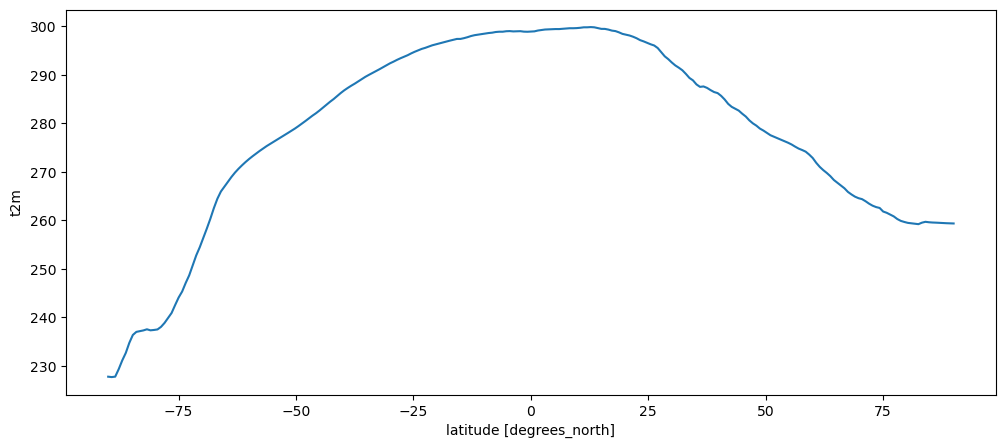

In [19]:
t2m_avg.mean(dim='longitude').plot();

**Q: look at the basic features of the plot. Can you recognize the important features from the map above?**

In [28]:
# Your answer here

## More data manipulation with xarray 

As you may have noted already, xarray's objects (called Dataset for the whole netCDF file or DataArray for single variables) are quite powerful, and can do more than much arrays know from other languages. in the primer we talked about the differences between python's lists and numpy's arrays. Today we introduced this new object (DataArray) which is one level higher in usability.

But don't worry if this sounds confusing at first! From now on we are going to use DataArrays only. The best thing about them is that they carry their dimension names and coordinates with them. This is the reason why it was so easy to make a plot with the correct axis labels in just one command. They have very useful other properties, and we will learn these step by step.

### Arithmetics with xarray

One of the first nice properties is that they behave just like regular arrays. That is, you can do arithmetic with them. Our first task will be to compute the 2m temperature in Celcius instead of Kelvin:

$$\overline{T_{2m}} [°C] = \overline{T_{2m}} [K] - 273.15$$

In [29]:
# Note that there are many different ways to get to the same result. For the sake of clarity we use the simple way:
t2m_avg_c = t2m_avg - 273.15

**E: plot t2m_avg_c on a map like we did before. Can you figure out why did xarray use another colormap? Describe the basic features of the plot. Where is the temperature negative? Positive?** 

In [30]:
# your answer here

Let's also compute the average temperature of the globe, a policy-relevant value:

In [64]:
avg_temp = t2m_avg_c.mean().item()
f'The average surface temperature of the Earth is (maybe): {avg_temp:.2f}°C'

'The average surface temperature of the Earth is (maybe): 5.29°C'

5.3°C... Sounds plausible? Maybe? 

**Q: use your googling skills to find out what the average global temperature really is. Quite far, isn't it?**

In [32]:
# Your answer here

Wait?!? What is going on here?

Well, this is an anoying "problem" with our planet: it happens to be a sphere. (Or something close to a sphere).

### Arithmetics and averages on a sphere

#### The problem

Why does it matter? It's a bit complicated to explain, but I'll do my best. 

Let's plot the data without a map projection to try to understand what's going on:

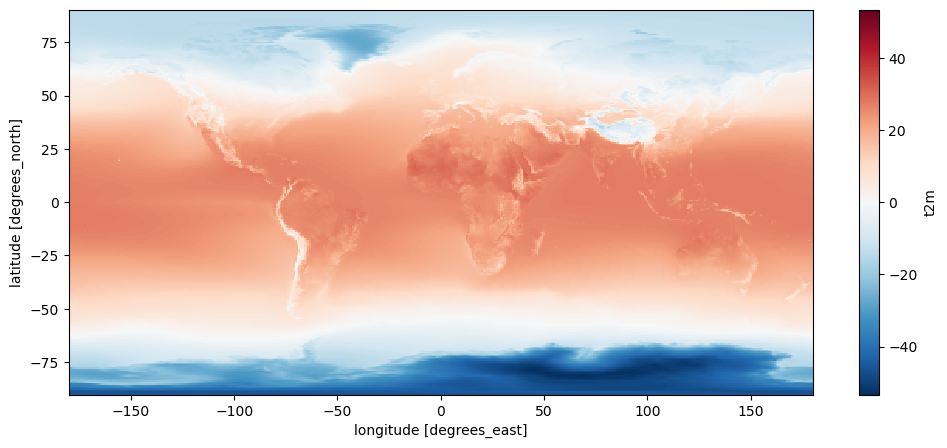

In [33]:
t2m_avg_c.plot();

The data is represented in the computer as a 2D image - a rectangle. This makes lots of sense from a data storage perspective: the data is global, and it has *regular* longitude and latitude intervals (0.75° - remember?).

The problem however is that 0.75° longitude does **not** represent the same distance on the ground at the equator than it does at the north Pole. Actually, the poles represent a trivial example of how extreme the differences are accross latitudes: if you stand *exactly* at the north pole, the distance between two longitudes is exactly 0. Weird, huh?

**Q: now use your google skills to find out the distance covered by 1° longitude at the equator. And at 45°N. Note it down below.**

In [34]:
# Your answer here

OK, so we've figured out that the distance covered by one degree longitude changes a lot between the equator and the poles.

**Q: now let's think about the latitudes. Does the same happen with latitudes? Why?**

In [35]:
# Your answer here

#### A solution

**The problem of computing averages on the sphere is that if we don't take this effect into account, we give way too much weight to the polar regions.** So, this is annoying but this something we have to take into account at the moment we compute spatial averages on a lat-lon dataset (which is quite often). This is why we talk about it today already. 

<div class="alert alert-success">
    <b>The explanations below contain a bit of maths to explain what is done. It's not necessary to remember that bit. The important message however is that one or two lines of code that you need to remember (or: copy-paste) will spare you quite some trouble later, if you use lon-lat datasets.</b>
</div>

In practice, to compute the *true* average on the sphere, we have to weight each latitudinal band by the cosinus of the latitude, i.e. $\cos \varphi$. As expected, $\cos \varphi$ tends towards 0 at the poles:

In [36]:
weight = np.cos(np.deg2rad(ds.latitude))
weight = weight / weight.sum()

Weight is an array of 241 elements, which is normalised so that its sum is 1. This is exactly what we need to compute a weighted average! First, we have to average over the longitudes (this is fine, because along a latitude circle all points have the same weight), and then compute the weighted average.

In [37]:
zonal_t2m_avg_c = t2m_avg_c.mean(dim='longitude')  # important! Always average over longitudes first
# this averaging is needed so that the arithmetic below makes sense 
# (multiply two arrays together)
weighted_t2m_avg_c = np.sum(zonal_t2m_avg_c * weight)
weighted_t2m_avg_c.item()

14.323060571556212

Aaaah, this looks much better now. Does it match your expecations?

**Note**: the remaining difference with your expectations is a combination of measurement errors, geometrical approximations (the Earth is not a perfect sphere, see e.g. [this post](https://towardsdatascience.com/the-correct-way-to-average-the-globe-92ceecd172b7), and the fact that the temperature is changing at an alarming rate, as we'll see next week.

### Data selection accross dimensions

Very often you will want to select parts of a multidimensional dataset (we will call them **"slices"** sometimes, which will make sense, you'll see).Perhaps the most common example is the wish to select a timeseries of data at a given location. Let's pick Bristol:

#### Select a location

Perhaps the most common example is the wish to select a timeseries of data at a given location. Let's pick Bristol:

In [39]:
bristol_lat = 51.454514
bristol_lon = -2.587910

The [`.sel()`](https://docs.xarray.dev/en/latest/generated/xarray.DataArray.sel.html) method from xarray is all we need here:

In [42]:
t2m_bristol = ds.t2m.sel(longitude=bristol_lon, latitude=bristol_lat, method='nearest')

**Q: explore the t2m_bristol variable. What are its dimensions? Now try to find out what `method='nearest'` does. Perhaps try to call `.sel()` without it.**

**E: Now plot the variable.**

In [45]:
# Your answer here

#### Select a specific time

What was the monthly average temperature in Bristol in August 2022? Let's find out:

In [53]:
t2m_bristol.sel(time='2022-08-01')

<xarray.DataArray 't2m' ()> Size: 4B
array(292.2011, dtype=float32)
Coordinates:
    time       datetime64[ns] 8B 2022-08-01
    latitude   float64 8B 51.75
    longitude  float64 8B -2.625
Attributes:
    long_name:      2 metre temperature
    units:          K
    standard_name:  unknown

**Q: what are the dimensions of the output above? Can you understand why? Now remember also the call to `item()` for a nicer output.**

In [54]:
# Your answer here

#### Select a time range (a slice)

It's equally easy to select a specific year out of the time series:

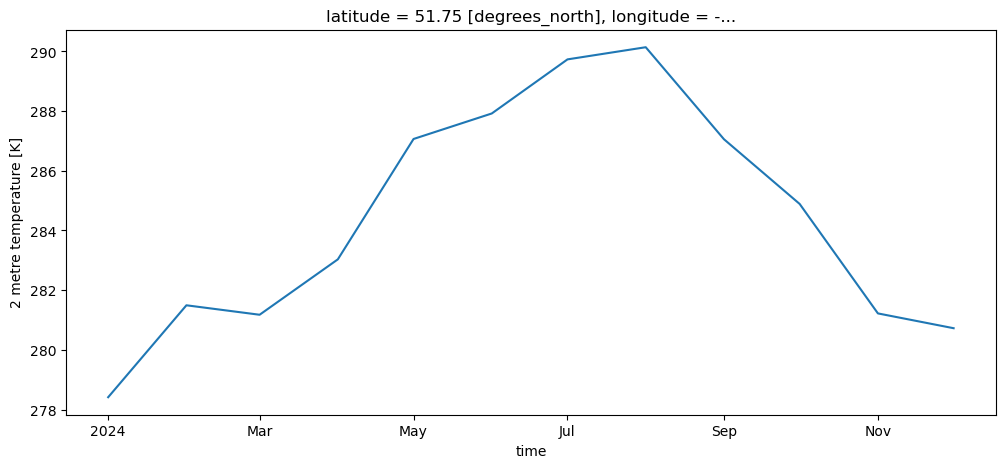

In [46]:
t2m_bristol_2024 = t2m_bristol.sel(time='2024')
t2m_bristol_2024.plot();

Or multiple years:

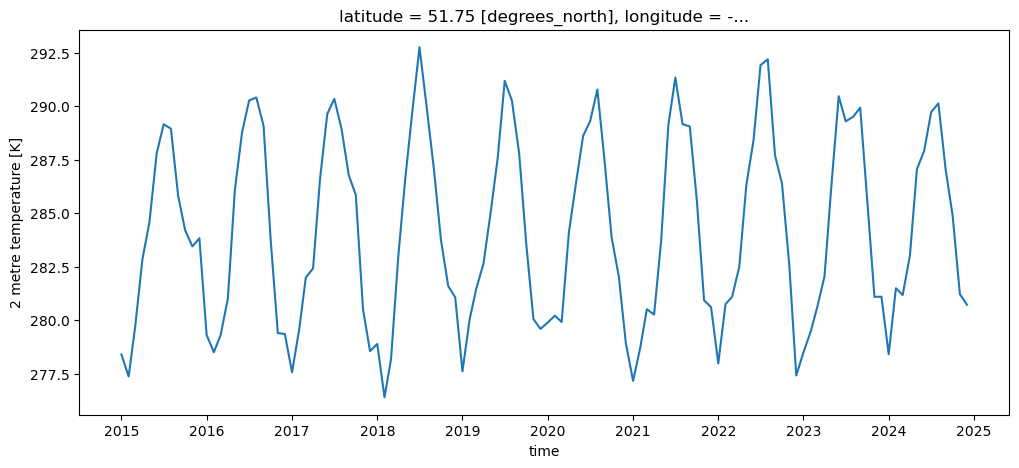

In [49]:
t2m_bristol_2015_2024 = t2m_bristol.sel(time=slice('2015', '2024'))  # See?! 
t2m_bristol_2015_2024.plot();

#### Select a time range (a slice) from a 3D cube

Selecting a time slice out of multidimensional dataset is as simple as from a timeseries. This is what makes xarray powerful:

In [50]:
t2m_slice = ds.t2m.sel(time=slice('2015', '2024')) 

**Q: compare the dimensions of `t2m_bristol_2015_2024` and `t2m_slice`. Compare the two calls to `.sel()` in both cases. Are they any different? Note for yourself what this means:**

In [55]:
# Your answer here

### Plot several lines on a line plot

With the help of a few commands, it is not a big deal to make a nice looking plot:

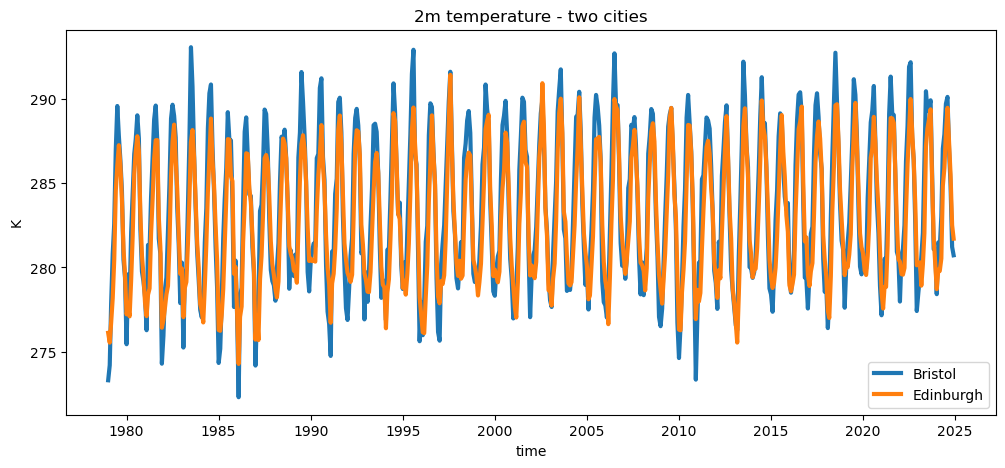

In [65]:
t2m_bristol = ds.t2m.sel(longitude=bristol_lon, latitude=bristol_lat, method='nearest')
t2m_edimburgh = ds.t2m.sel(longitude=3.1883, latitude=55.9533, method='nearest')

t2m_bristol.plot(label='Bristol', linewidth=3)
t2m_edimburgh = t2m_edimburgh.plot(label='Edinburgh', linewidth=3)

plt.title('2m temperature - two cities')
plt.legend(loc='best')
plt.ylabel('K');